# Codecademy project Life expectancy gdp

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the data ###

In [35]:
data = pd.read_csv('all_data.csv')
data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [36]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [37]:
data.GDP = data.GDP/1000000000
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.498571
std,4.633971,10.672882,5197.561311
min,2000.000000,44.300000,4.415703
25%,2003.750000,74.475000,173.301750
50%,2007.500000,76.750000,1280.220000
75%,2011.250000,78.900000,4067.510000
max,2015.000000,81.000000,18100.000000


In [38]:
data = data.rename({"Life expectancy at birth (years)":"LEAB"}, axis = "columns")

In [39]:
countries = data.Country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [40]:
years = data.Year.unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

### Plots 

Text(0.5, 1.0, 'Histogram of the life expectancy')

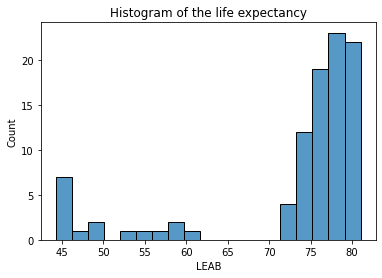

In [41]:
sns.histplot(x='LEAB', data=data)
plt.title("Histogram of the life expectancy")

Life expectancy histogram is left skewed. Most observations are placed on the right side, but there is a smaller group on the left side.

Text(0.5, 1.0, 'Histogram of the gross domestic product')

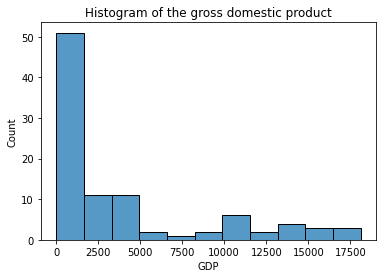

In [10]:
sns.histplot(x='GDP', data=data)
plt.title("Histogram of the gross domestic product")

GDP histogram is right skewed. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Zimbabwe'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'Chile'),
  Text(5, 0, 'Germany')])

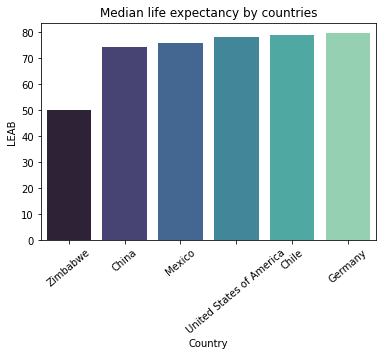

In [14]:
dt = data.groupby('Country')['LEAB'].mean().sort_values()
sns.barplot(x =dt.index, y=dt, palette = 'mako')
plt.title('Median life expectancy by countries')
plt.xticks(rotation=40)

In this chart, it can be seen that mean life expectancy is quite similar in most countries except Zimbabwe. Compared to others, its values are noticeably lower. So, that explains why the histogram has some observations on the left side which are placed away from another data.  

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Zimbabwe'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'China'),
  Text(5, 0, 'United States of America')])

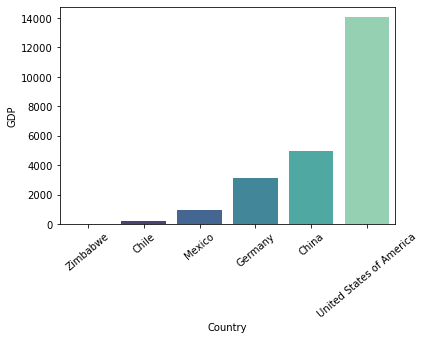

In [13]:
dt = data.groupby('Country')['GDP'].mean().sort_values()
sns.barplot(y=dt, x = dt.index, palette = 'mako')
plt.xticks(rotation=40)

This chart illustrates that the USA has the biggest GDP value among all countries. 

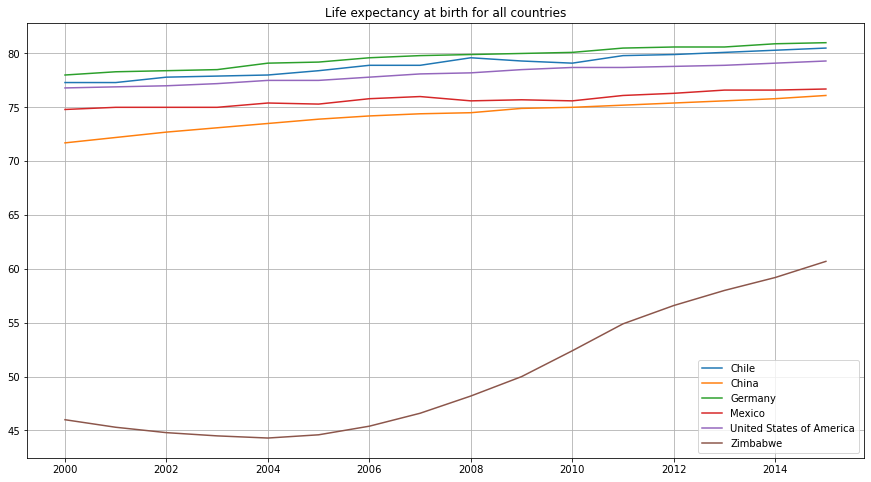

In [15]:
plt.figure(figsize=(15, 8))
plt.grid()
for i in range(0, len(countries)):
    plt.plot(years, data[data.Country == countries[i]]['LEAB'])
plt.legend(countries)
plt.title('Life expectancy at birth for all countries')
plt.show()

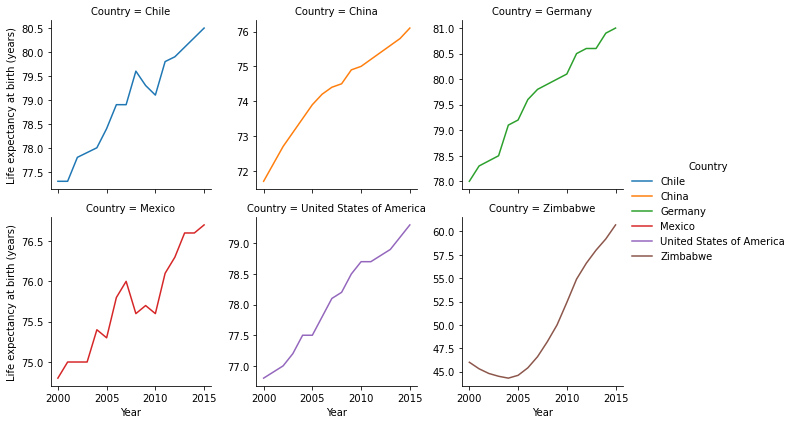

In [17]:
graph_life_exp= sns.FacetGrid(data, col="Country",  col_wrap=3,
                      hue = "Country",sharey = False)

graph_life_exp = (graph_life_exp.map(sns.lineplot,"Year","LEAB")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graph_life_exp;

According to these charts, life expectancy has increased over the last 16 years. Compared to all countries, Zimbabwe has quite a shorter life expectancy, but it has also increased the most since 2004. In addittion, the biggest decreases were observed in Chile and Mexico in the same time(in 2010).

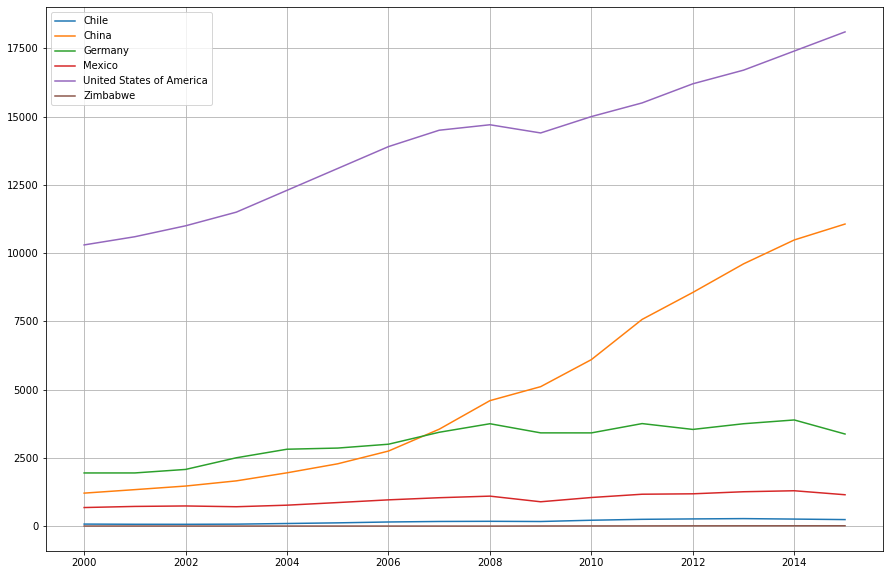

In [19]:
plt.figure(figsize=(15, 10))
plt.grid()
for i in range(0, len(countries)):
    plt.plot(years, data[data.Country == countries[i]]['GDP'])
plt.legend(countries)
plt.show()

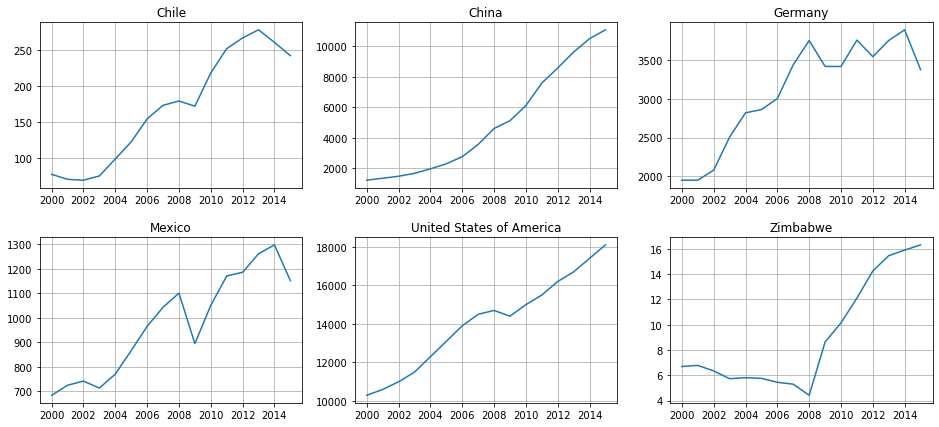

In [23]:
plt.figure(figsize=(16, 7))
for i in range(0, len(countries)):
    ax = plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.30)
    plt.plot(years, data[data.Country == countries[i]]['GDP'])
    plt.grid()
    ax.set_xticks(np.arange(2000, 2016, 2))
    plt.title(countries[i])
plt.show() 

These charts show that the GDP of all countries has increased in 16 years.The USA and China have seen the biggest increases, according to the first graph. Also, Chile, Germany, Mexico and the USA had a decrease at the same time (in 2009).

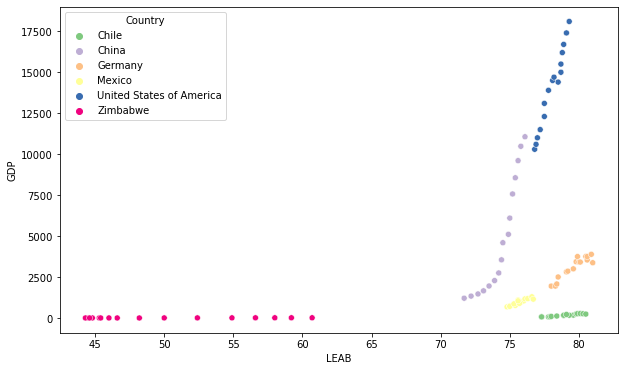

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LEAB', y ='GDP', hue='Country', data=data, palette = 'Accent')
plt.show()

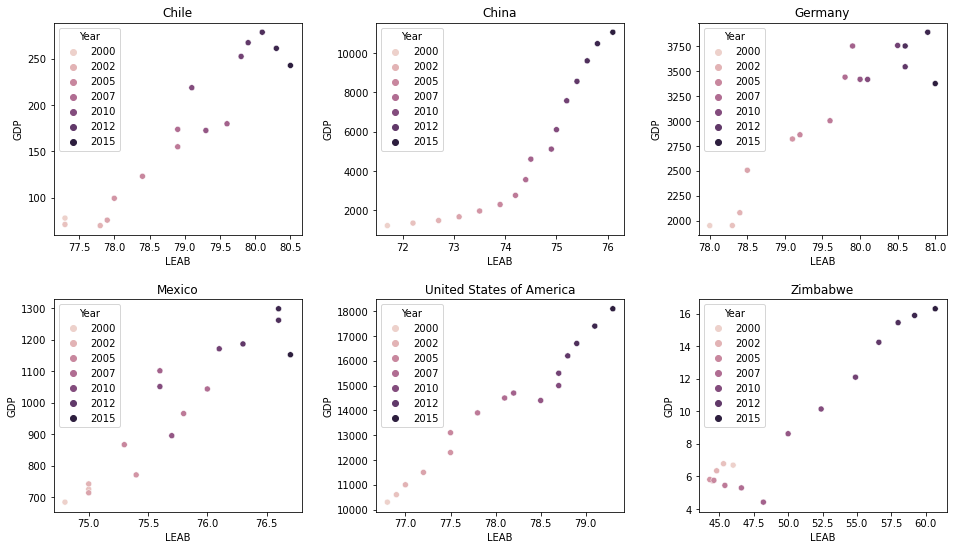

In [44]:
plt.figure(figsize=(16, 9))
for i in range(0, len(countries)):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.30, wspace=0.3)
    sns.scatterplot(x='LEAB', y ='GDP', hue='Year', data=data[data.Country==countries[i]])
    plt.title(countries[i])
plt.show()   


Based on the first chart we can see that Zimbabwe and Chile are staying flat because of the small GDP growth instead of China and the USA with the biggest increase. In the individual plots it seems that most countries have a linear correlation between GDP and life expectancy.

### Conclusions

- Has life expectancy increased over time in the six nations?
        Yes, life expectancy has increased. Among the other countries, Zimbabwe has the largest increase.
- Has GDP increased over time in the six nations?
        Yes, gross domestic product has increased over time. In comparison to other countries, the USA and China show the largest growth.
- Is there a correlation between GDP and life expectancy of a country?
        Yes, all countries have a positive strong correlation between GDP and life expectancy.
- What is the average life expectancy in these nations?
        Average life expectancy in Zimbabwe is 50 years, while in the other 5 countries it ranges from 74 to 80 years. Here are some more accurate values.

In [45]:
data.groupby('Country')['LEAB'].mean()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LEAB, dtype: float64

- What is the distribution of that life expectancy?
        The life expactancy distribution is left skew.